In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_excel("netflix_movie_dataset.xlsx")

In [12]:
df.head(10)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2012-01-07,Netflix Movie 1,This is the overview of Netflix Movie 1.,183.8,48570,5.8,ko,"Romance,Sci-Fi, Action, Thriller",https://image.tmdb.org/t/p/netflix_movie_1.jpg
1,2001-05-09,Netflix Movie 2,This is the overview of Netflix Movie 2.,87.8,33994,7.2,ko,Sci-Fi,https://image.tmdb.org/t/p/netflix_movie_2.jpg
2,2007-03-03,Netflix Movie 3,This is the overview of Netflix Movie 3.,100.0,39824,4.9,es,Comedy,https://image.tmdb.org/t/p/netflix_movie_3.jpg
3,2000-07-06,Netflix Movie 4,This is the overview of Netflix Movie 4.,161.1,4831,5.6,en,Documentary,https://image.tmdb.org/t/p/netflix_movie_4.jpg
4,2003-05-11,Netflix Movie 5,This is the overview of Netflix Movie 5.,153.6,14244,4.8,en,Action,https://image.tmdb.org/t/p/netflix_movie_5.jpg
5,2006-01-12,Netflix Movie 6,This is the overview of Netflix Movie 6.,224.4,35080,4.5,ko,Comedy,https://image.tmdb.org/t/p/netflix_movie_6.jpg
6,2008-09-24,Netflix Movie 7,This is the overview of Netflix Movie 7.,175.4,3395,8.3,fr,Animation,https://image.tmdb.org/t/p/netflix_movie_7.jpg
7,2022-05-13,Netflix Movie 8,This is the overview of Netflix Movie 8.,178.5,13121,6.3,fr,Thriller,https://image.tmdb.org/t/p/netflix_movie_8.jpg
8,2002-06-16,Netflix Movie 9,This is the overview of Netflix Movie 9.,151.3,24138,5.9,pt,Sci-Fi,https://image.tmdb.org/t/p/netflix_movie_9.jpg
9,2019-10-07,Netflix Movie 10,This is the overview of Netflix Movie 10.,60.8,19001,8.1,de,Action,https://image.tmdb.org/t/p/netflix_movie_10.jpg


In [13]:
df['Genre']

,Genre
0,"Romance,Sci-Fi, Action, Thriller"
1,Sci-Fi
2,Comedy
3,Documentary
4,Action
...,...
445,"Animation,Horror"
446,"Horror,Thriller,Animated"
447,Sci-Fi
448,"Sci-Fi, Horror"


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       450 non-null    object 
 1   Title              450 non-null    object 
 2   Overview           450 non-null    object 
 3   Popularity         450 non-null    float64
 4   Vote_Count         450 non-null    int64  
 5   Vote_Average       450 non-null    float64
 6   Original_Language  450 non-null    object 
 7   Genre              450 non-null    object 
 8   Poster_Url         450 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 31.8+ KB


In [26]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

print(df['Release_Date'].dtypes)

# The pandas.to_datetime() function in the Pandas library is used to convert various input types into datetime objects. This function is essential for handling time-series data and performing date and time manipulations in Pandas.

datetime64[ns]


In [27]:
df.head(2)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2012-01-07,Netflix Movie 1,This is the overview of Netflix Movie 1.,183.8,48570,5.8,ko,"Romance,Sci-Fi, Action, Thriller",https://image.tmdb.org/t/p/netflix_movie_1.jpg
1,2001-05-09,Netflix Movie 2,This is the overview of Netflix Movie 2.,87.8,33994,7.2,ko,Sci-Fi,https://image.tmdb.org/t/p/netflix_movie_2.jpg


In [28]:
df['Release_Date'].dtypes

dtype('<M8[ns]')

In [ ]:
cols = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(cols, axis=1, inplace=True)
df.columns

In [36]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2012-01-07,Netflix Movie 1,183.8,48570,5.8,"Romance,Sci-Fi, Action, Thriller"
1,2001-05-09,Netflix Movie 2,87.8,33994,7.2,Sci-Fi
2,2007-03-03,Netflix Movie 3,100.0,39824,4.9,Comedy
3,2000-07-06,Netflix Movie 4,161.1,4831,5.6,Documentary
4,2003-05-11,Netflix Movie 5,153.6,14244,4.8,Action


**Categorizing Vote_Average Column




```

**

***

In [ ]:
def categorize_col(df, col, labels):
  edges =  [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
               df[col].describe()['75%'],
               df[col].describe()['max']]
  df[col] = pd.cut(df[col],edges, labels = labels, duplicates = 'drop' )
  return df


labels = ['not_popular', 'below_Avg', 'average', 'popular']

categorize_col(df, 'Vote_Average', labels)

# df['Vote_Average'].unique()


# The pandas.cut() function in the Pandas library is used to segment and sort data values into discrete intervals, also known as "bins." This function is particularly useful for converting a continuous variable into a categorical one.

In [48]:
df['Vote_Average'].value_counts()

,count
Vote_Average,
below_Avg,118
popular,111
not_popular,108
average,108


In [49]:
df.dropna(inplace= True)

df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


In [50]:
df.head(10)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2012-01-07,Netflix Movie 1,183.8,48570,below_Avg,"Romance,Sci-Fi, Action, Thriller"
1,2001-05-09,Netflix Movie 2,87.8,33994,average,Sci-Fi
2,2007-03-03,Netflix Movie 3,100.0,39824,not_popular,Comedy
3,2000-07-06,Netflix Movie 4,161.1,4831,below_Avg,Documentary
4,2003-05-11,Netflix Movie 5,153.6,14244,not_popular,Action
5,2006-01-12,Netflix Movie 6,224.4,35080,not_popular,Comedy
6,2008-09-24,Netflix Movie 7,175.4,3395,popular,Animation
7,2022-05-13,Netflix Movie 8,178.5,13121,below_Avg,Thriller
8,2002-06-16,Netflix Movie 9,151.3,24138,below_Avg,Sci-Fi
9,2019-10-07,Netflix Movie 10,60.8,19001,popular,Action


**Casting Column Into Category**



In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445 entries, 0 to 449
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Release_Date  445 non-null    datetime64[ns]
 1   Title         445 non-null    object        
 2   Popularity    445 non-null    float64       
 3   Vote_Count    445 non-null    int64         
 4   Vote_Average  445 non-null    category      
 5   Genre         445 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 21.5+ KB


In [52]:
#We split genres into a list and then explode our dataframe to have only one
# genre per row for each movie


df['Genre'] = df['Genre'].str.split(',')

df = df.explode('Genre').reset_index(drop =  True)
df.head(10)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2012-01-07,Netflix Movie 1,183.8,48570,below_Avg,Romance
1,2012-01-07,Netflix Movie 1,183.8,48570,below_Avg,Sci-Fi
2,2012-01-07,Netflix Movie 1,183.8,48570,below_Avg,Action
3,2012-01-07,Netflix Movie 1,183.8,48570,below_Avg,Thriller
4,2001-05-09,Netflix Movie 2,87.8,33994,average,Sci-Fi
5,2007-03-03,Netflix Movie 3,100.0,39824,not_popular,Comedy
6,2000-07-06,Netflix Movie 4,161.1,4831,below_Avg,Documentary
7,2003-05-11,Netflix Movie 5,153.6,14244,not_popular,Action
8,2006-01-12,Netflix Movie 6,224.4,35080,not_popular,Comedy
9,2008-09-24,Netflix Movie 7,175.4,3395,popular,Animation


In [53]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=[' Action', ' Comedy', ' Horror', ' Sc--fi', ' Sci-Fi',
                  ' Thriller', 'Action', 'Animated', 'Animation', 'Comedy',
                  'Documentary', 'Drama', 'Horror', 'Romance', 'Sci-Fi',
                  'Sci-fi', 'Thriller'],
, ordered=False, categories_dtype=object)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Release_Date  465 non-null    datetime64[ns]
 1   Title         465 non-null    object        
 2   Popularity    465 non-null    float64       
 3   Vote_Count    465 non-null    int64         
 4   Vote_Average  465 non-null    category      
 5   Genre         465 non-null    category      
dtypes: category(2), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 16.4+ KB


In [57]:
df.nunique()

,0
Release_Date,439
Title,445
Popularity,417
Vote_Count,444
Vote_Average,4
Genre,17


In [58]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2012-01-07,Netflix Movie 1,183.8,48570,below_Avg,Romance
1,2012-01-07,Netflix Movie 1,183.8,48570,below_Avg,Sci-Fi
2,2012-01-07,Netflix Movie 1,183.8,48570,below_Avg,Action
3,2012-01-07,Netflix Movie 1,183.8,48570,below_Avg,Thriller
4,2001-05-09,Netflix Movie 2,87.8,33994,average,Sci-Fi


In [59]:
df.nunique()

,0
Release_Date,439
Title,445
Popularity,417
Vote_Count,444
Vote_Average,4
Genre,17


**DATA VISUALIZATION**

In [61]:
sns.set_style("whitegrid")

In [ ]:
# What is the most frequent genre of movies released on NetFliz?


In [62]:
df['Genre'].describe()

,Genre
count,465
unique,17
top,Sci-Fi
freq,66


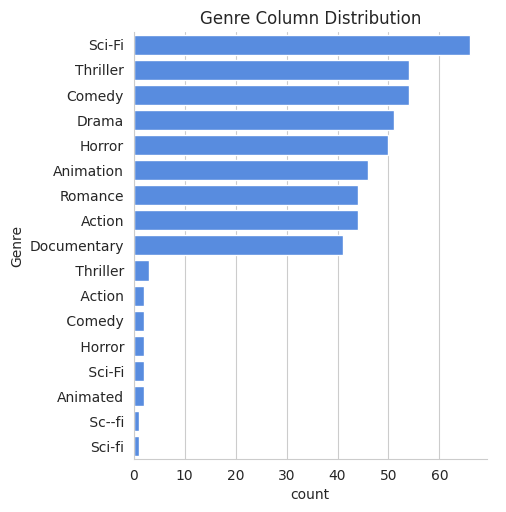

In [63]:
sns.catplot(y ='Genre', data = df, kind = 'count',
            order = df['Genre'].value_counts().index,
            color = '#4287f5')
plt.title('Genre Column Distribution')
plt.show()

In [64]:
# Which has Highest Votes in Vote Average Column?
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2012-01-07,Netflix Movie 1,183.8,48570,below_Avg,Romance
1,2012-01-07,Netflix Movie 1,183.8,48570,below_Avg,Sci-Fi
2,2012-01-07,Netflix Movie 1,183.8,48570,below_Avg,Action
3,2012-01-07,Netflix Movie 1,183.8,48570,below_Avg,Thriller
4,2001-05-09,Netflix Movie 2,87.8,33994,average,Sci-Fi


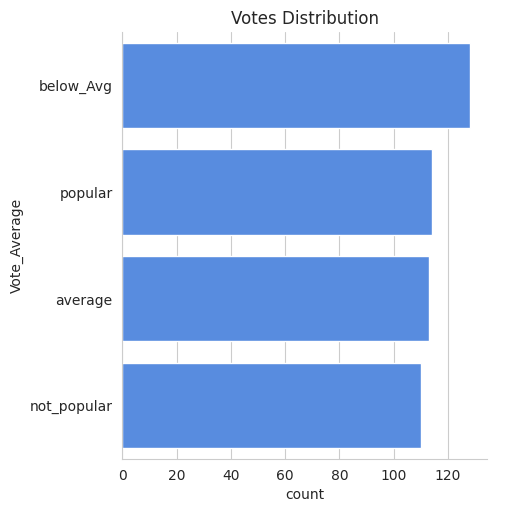

In [67]:
sns.catplot(y ='Vote_Average', data = df, kind = 'count',
            order = df['Vote_Average'].value_counts().index,
             color = '#4287f5')
plt.title("Votes Distribution")

plt.show()

**What Movie Got the Highest Popularity? What's its Genre**

In [68]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2012-01-07,Netflix Movie 1,183.8,48570,below_Avg,Romance
1,2012-01-07,Netflix Movie 1,183.8,48570,below_Avg,Sci-Fi


In [71]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
443,2016-01-21,Netflix Movie 439,299.9,13126,below_Avg,Romance
444,2016-01-21,Netflix Movie 439,299.9,13126,below_Avg,Comedy
445,2016-01-21,Netflix Movie 439,299.9,13126,below_Avg,Animated


**What Movie Got the Lowest Popularity? What's genre**

In [72]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
20,2010-10-21,Netflix Movie 18,10.4,25314,below_Avg,Animation


**Which Year has the Most Flimmed Movie**

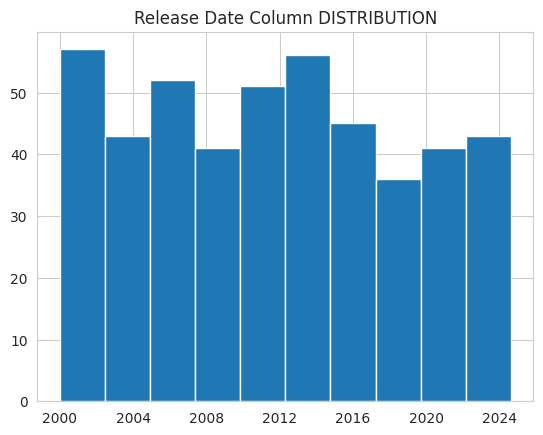

In [73]:
df['Release_Date'].hist()
plt.title("Release Date Column DISTRIBUTION")

plt.show()